In [6]:
import sys
sys.executable
sys.version

'3.6.3 |Anaconda, Inc.| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]'

In [7]:
# General: 
import tweepy
import pandas as pd
import numpy as np

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
# We import our access keys:
from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [9]:
# We create an extractor object:
# Requires an internet connection for running this cell
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="BarackObama", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

I got my start holding community meetings in Chicago, so it was fun to be home for one tonight. Michelle and I want… https://t.co/1ammpZayJx

Young people have helped lead all our great movements. How inspiring to see it again in so many smart, fearless stu… https://t.co/wXO3wBtJ8V

Billy Graham was a humble servant who prayed for so many - and who, with wisdom and grace, gave hope and guidance t… https://t.co/V8WtgIRPEB

We are grieving with Parkland. But we are not powerless. Caring for our kids is our first job. And until we can hon… https://t.co/LWGSkzRapH

Happy Valentine’s Day, @MichelleObama. You make every day and every place better. https://t.co/aWvyytR7Mm



In [11]:
# Create a pandas dataframe
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# Display first 10 elements of the dataframe
display(data.head(10))

,Tweets
0,I got my start holding community meetings in C...
1,Young people have helped lead all our great mo...
2,Billy Graham was a humble servant who prayed f...
3,We are grieving with Parkland. But we are not ...
4,"Happy Valentine’s Day, @MichelleObama. You mak..."
5,RT @MichelleObama: Happy #ValentinesDay to my ...
6,Dr. King was 26 when the Montgomery bus boycot...
7,All across America people chose to get involve...
8,Ten-year-old Jahkil Jackson is on a mission to...
9,Chris Long gave his paychecks from the first s...


In [12]:
# Internal methods of a single tweet object
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [13]:
# Examples of tweet attributes we can take a look at:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

968681836078608385
2018-02-28 02:58:41
Twitter for iPhone
220760
35386
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/1ammpZayJx', 'expanded_url': 'https://twitter.com/i/web/status/968681836078608385', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [117, 140]}]}


In [14]:
# Add relevant data to our dataframe
# Even if we don't have the column name there, we can create a column simply by declaring its contents
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [15]:
# Take a look at our new dataframe
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,I got my start holding community meetings in C...,140,968681836078608385,2018-02-28 02:58:41,Twitter for iPhone,220760,35386
1,Young people have helped lead all our great mo...,140,966704319658647553,2018-02-22 16:00:44,Twitter for iPhone,1631664,449625
2,Billy Graham was a humble servant who prayed f...,140,966350067287363584,2018-02-21 16:33:04,Twitter for iPhone,254923,35151
3,We are grieving with Parkland. But we are not ...,140,964185606803853314,2018-02-15 17:12:17,Twitter for iPhone,1324253,383138
4,"Happy Valentine’s Day, @MichelleObama. You mak...",105,963811333685817346,2018-02-14 16:25:03,Twitter for iPhone,1520844,245557
5,RT @MichelleObama: Happy #ValentinesDay to my ...,140,963811162482728961,2018-02-14 16:24:22,Twitter for iPhone,0,26721
6,Dr. King was 26 when the Montgomery bus boycot...,140,952914779458424832,2018-01-15 14:46:02,Twitter for iPhone,1468585,377791
7,All across America people chose to get involve...,140,946775615893655552,2017-12-29 16:11:11,Twitter for iPhone,505351,116443
8,Ten-year-old Jahkil Jackson is on a mission to...,140,946775467536928768,2017-12-29 16:10:36,Twitter for iPhone,308167,49412
9,Chris Long gave his paychecks from the first s...,140,946775332564230144,2017-12-29 16:10:04,Twitter for iPhone,269711,67740


In [16]:
# Extract mean of length of tweets
mean = np.mean(data['len'])
print("The average tweet length is: {}".format(mean))

The average tweet length is: 125.295


In [28]:
# Extract the value of the most FAVs (favorites) and most RTs (retweets) of any of the 200 tweets
max_favs = np.max(data['Likes'])
max_rts = np.max(data['RTs'])

# Extracting the first tweet with the most FAVs (there may be the case were there are 2 maxs)
fav = data[data.Likes == max_favs].index[0]

# Extracting the first tweet with the most RTs (there may be the case were there are 2 maxs)
rt = data[data.RTs == max_rts].index[0]

# Max FAVs
print("The tweet with the most FAVs is: \n{}".format(data['Tweets'][fav]))
print("Number of favorites is: {}".format(max_favs))
print("The tweet with the most FAVs has {} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets is: {}".format(max_rts))
print("The tweet with the most retweets has {} characters.\n".format(data['len'][rt]))


The tweet with the most FAVs is: 
"No one is born hating another person because of the color of his skin or his background or his religion..." https://t.co/InZ58zkoAm
Number of favorites is: 4597872
The tweet with the most FAVs has 132 characters.

The tweet with more retweets is: 
"No one is born hating another person because of the color of his skin or his background or his religion..." https://t.co/InZ58zkoAm
Number of retweets is: 1715686
The tweet with the most retweets has 132 characters.



In [30]:
# Create time series for data:
t_len = pd.Series(data=data['len'].values, index=data['Date'])
t_fav = pd.Series(data=data['Likes'].values, index=data['Date'])
t_ret = pd.Series(data=data['RTs'].values, index=data['Date'])

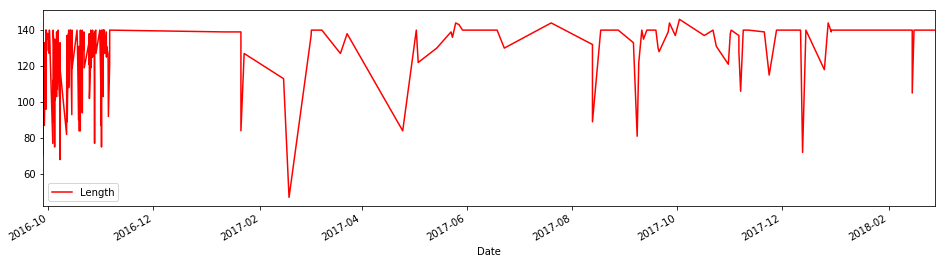

In [35]:
# Plot time (x-axis) against length of tweets (y-axis)
t_len.plot(figsize=(16,4), label="Length", color='r', legend=True)

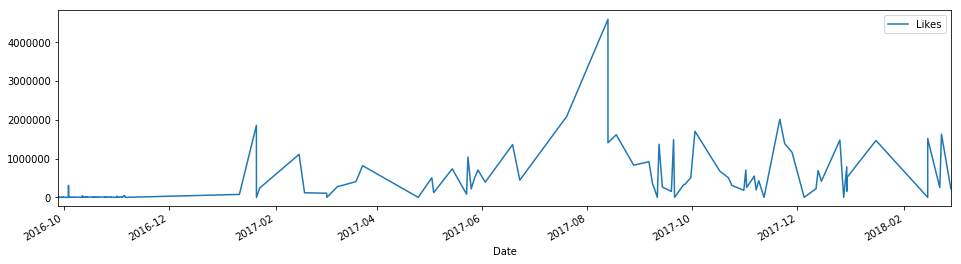

In [32]:
# Plot time (x-axis) against number of favorites for each tweet
t_fav.plot(figsize=(16,4), label="Likes", legend=True)

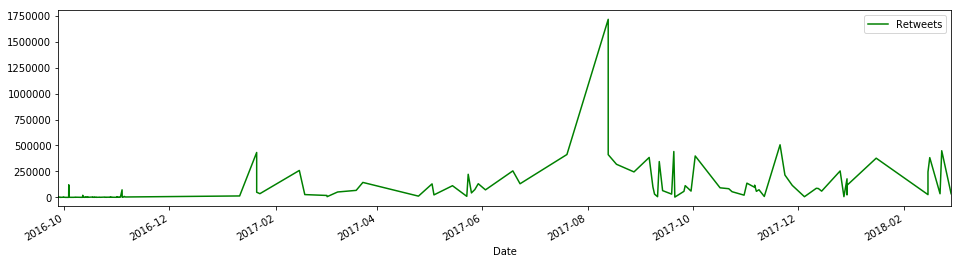

In [37]:
# Plot time (x-axis) against number of retweets for each tweet (y-axis)
t_ret.plot(figsize=(16,4), label="Retweets", color="g", legend=True)

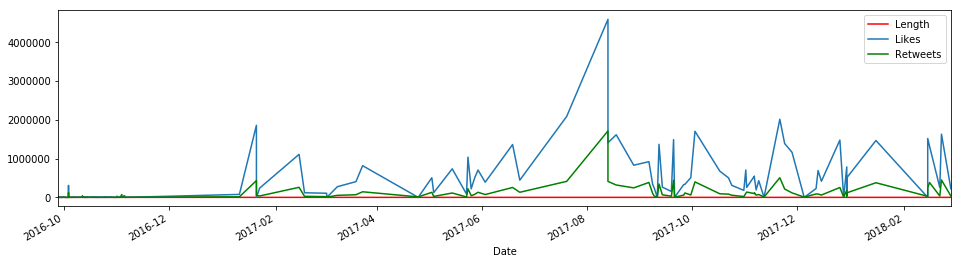

In [38]:
# If we plot all 3 graphs together, we get:

t_len.plot(figsize=(16,4), label="Length", color='r', legend=True)
t_fav.plot(figsize=(16,4), label="Likes", legend=True)
t_ret.plot(figsize=(16,4), label="Retweets", color="g", legend=True)

# Note that the length appears to be a horizontal line because it's scale (max length = 144) in comparison to  

In [39]:
# Obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)
        
# Print sources list:
print("Creation of content sources")
for source in sources:
    print("* {}".format(source))

Creation of content sources
* Twitter for iPhone
* Twitter Web Client


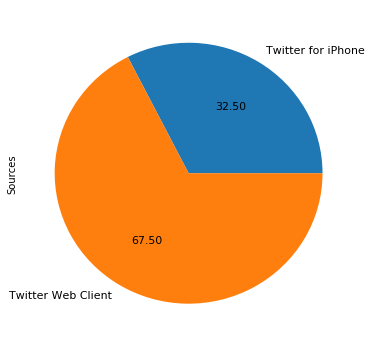

In [43]:
# Create a numpy vector mapped to labels:
# Each element of the array maps to a percentage for each source label
percent = np.zeros(len(sources))

# Count the number of each source and create a pie chart.
for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass
        
percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name="Sources")
pie_chart.plot.pie(fontsize=11, autopct="%.2f", figsize=(6,6))